In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# series
s = pd.Series([1, 3, 5, np.nan, 6, 8, 'txt'])
print(s)

# dataframe
dates= pd.date_range(start='2023-01-01', periods=6)
print(dates)

df = pd.DataFrame(np.random.randn(6, 5), index=dates, columns=list('ABCDE'))
print(df)

df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp('2023-01-01'),
        "C": pd.Series(1, index=list(range(4)), dtype='float32'),
        "D": np.array([3] * 4, dtype='int32'),
        "E": pd.Categorical(["test", "train", "val", "test"]),
        "F": "foo"
   }
)
print(df2)
print(df2.dtypes)

0      1
1      3
2      5
3    NaN
4      6
5      8
6    txt
dtype: object
DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D         E
2023-01-01  0.134939 -1.042205 -1.538906  0.349154 -0.391309
2023-01-02 -1.143810  0.122491 -2.215488 -0.708590  1.059481
2023-01-03 -0.994151  0.162067  1.129449 -1.058555  0.473741
2023-01-04  1.222106  0.643376  0.263663 -0.492334  0.139993
2023-01-05 -0.881111  0.298404 -0.648081 -0.050630 -0.750528
2023-01-06  1.003606 -1.463789  0.894638 -1.262713  0.718324
     A          B    C  D      E    F
0  1.0 2023-01-01  1.0  3   test  foo
1  1.0 2023-01-01  1.0  3  train  foo
2  1.0 2023-01-01  1.0  3    val  foo
3  1.0 2023-01-01  1.0  3   test  foo
A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object


In [ ]:
print(df2.B[3])
df2.head()

2023-01-01 00:00:00


,A,B,C,D,E,F
0,1.0,2023-01-01,1.0,3,test,foo
1,1.0,2023-01-01,1.0,3,train,foo
2,1.0,2023-01-01,1.0,3,val,foo
3,1.0,2023-01-01,1.0,3,test,foo


In [ ]:
df2.columns
df2.to_numpy()

df2.describe()
df2.T

df2.sort_index(axis=1, ascending=True)
df2.sort_values(by='E', ascending=True)


"""
While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, DataFrame.at(), DataFrame.iat(), DataFrame.loc() and DataFrame.iloc().
"""

'\nWhile standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, DataFrame.at(), DataFrame.iat(), DataFrame.loc() and DataFrame.iloc().\n'

In [ ]:
df["A"]
df.A

df[:3]

df['2023-01-01':'2023-01-02']

df.loc[dates[0]]

df.loc[:, ["A", "B"]]

df.loc["2023-01-01":"2023-01-02", ["A", "B"]]
df.loc[dates[0], "A"]
df.at[dates[0], "A"]


# Selection by position
df.iloc[3]
# Integer slices acts similar to NumPy/Python:
df.iloc[3:5, 0:2]

df.iloc[[0, 2, 4], 0]
df.iloc[[0, 2, 4], :]
df.iloc[:, 1:3]
df.iloc[1, 1]
df[df["A"] > 0]
df[df > 0]

df2 = df.copy()
df2["E"] = ["one", "two", "three", "four", "three", "six"]
df2["E"].isin(["two", "three"])


,E
2023-01-01,False
2023-01-02,True
2023-01-03,True
2023-01-04,False
2023-01-05,True
2023-01-06,False


In [ ]:
# Setting Values
s1 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9], index=pd.date_range(start='2023-01-01', periods=9))
s1

df["F"] = s1
df.at[dates[0], "A"] = 0
df.iat[0, 1]= 0
df.loc[:, "D"] = np.array([5] * len(df))
df.loc[:, "D"]



,D
2023-01-01,5.0
2023-01-02,5.0
2023-01-03,5.0
2023-01-04,5.0
2023-01-05,5.0
2023-01-06,5.0


In [ ]:
# Missing data
df.dropna(how="any")

pd.isna(df)

# calculate mean for each column
df.mean(axis=0) # or df.mean()

# calculate mean for each row
df.mean(axis=1)


,0
2023-01-01,0.678297
2023-01-02,0.803779
2023-01-03,1.461851
2023-01-04,1.878190
2023-01-05,1.336447
2023-01-06,2.025463


In [ ]:
df

,A,B,C,D,E,F
2023-01-01,0.000000,0.000000,-1.538906,5.0,-0.391309,1
2023-01-02,-1.143810,0.122491,-2.215488,5.0,1.059481,2
2023-01-03,-0.994151,0.162067,1.129449,5.0,0.473741,3
2023-01-04,1.222106,0.643376,0.263663,5.0,0.139993,4
2023-01-05,-0.881111,0.298404,-0.648081,5.0,-0.750528,5
2023-01-06,1.003606,-1.463789,0.894638,5.0,0.718324,6


In [ ]:
# aggregations
df.agg(lambda x: np.mean(x) * 5.6)

df.transform(lambda x: x * 100)

,A,B,C,D,E,F
2023-01-01,0.000000,0.000000,-153.890605,500.0,-39.130910,100
2023-01-02,-114.381050,12.249060,-221.548792,500.0,105.948141,200
2023-01-03,-99.415073,16.206711,112.944916,500.0,47.374118,300
2023-01-04,122.210588,64.337644,26.366307,500.0,13.999304,400
2023-01-05,-88.111098,29.840420,-64.808110,500.0,-75.052798,500
2023-01-06,100.360584,-146.378873,89.463755,500.0,71.832410,600


In [ ]:
# value counts
s = pd.Series(np.random.randint(0, 7, size=10))
print(s)

0    0
1    0
2    6
3    3
4    4
5    5
6    1
7    3
8    2
9    1
dtype: int64


In [ ]:
s.value_counts().sort_index()

,count
0,2
1,2
2,1
3,2
4,1
5,1
6,1


In [ ]:
# merges

left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [ ]:
pd.merge(left, right, on="key", how="outer")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [ ]:
# grouping

df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

df

,A,B,C,D
0,foo,one,0.653850,0.577342
1,bar,one,-0.501195,-0.172452
2,foo,two,-0.557987,0.132976
3,bar,three,1.170870,-0.363084
4,foo,two,-1.530591,-0.615004
5,bar,two,-0.701432,2.219607
6,foo,one,0.425619,-1.826160
7,foo,three,0.881538,0.937806


In [ ]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-0.031757,1.684071
foo,-0.127572,-0.793040


In [ ]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.501195 -0.172452
    three  1.170870 -0.363084
    two   -0.701432  2.219607
foo one    1.079469 -1.248818
    three  0.881538  0.937806
    two   -2.088578 -0.482028

In [ ]:
from colabtools import f1
from google.colab import data_table
df = f1.Execute(f"""

""")
data_table.display_dataframe(df)

In [ ]:
# timeseries
rng = pd.date_range("1/1/2012", periods=1000, freq="s")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts_utc = ts.tz_localize("UTC")
ts_utc.resample("5Min").sum()


,0
2012-01-01 00:00:00+00:00,22.249564
2012-01-01 00:05:00+00:00,14.170479
2012-01-01 00:10:00+00:00,-2.950063
2012-01-01 00:15:00+00:00,4.681021


In [ ]:
# categoricals

df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [ ]:
df["grade"] = df["raw_grade"].astype("category")
new_categories = ["very good", "good", "very bad"]

df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [ ]:
# plotting
import matplotlib.pyplot as plt
plt.close("all")

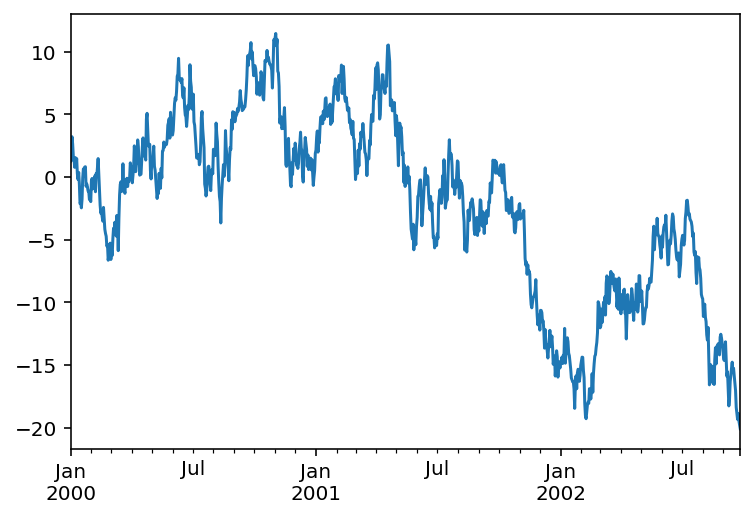

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();


<Figure size 432x288 with 0 Axes>

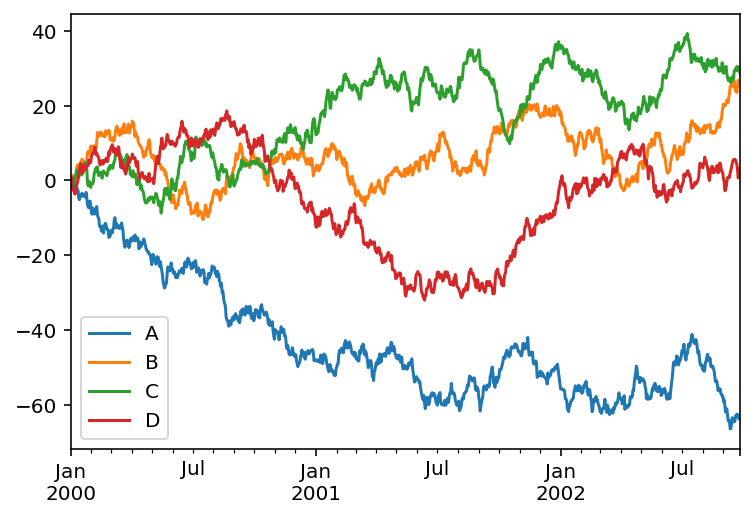

In [ ]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()

plt.figure();

df.plot();

plt.legend(loc='best');

In [2]:
import pandas as pd

df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# transform() - Centering data
def center(x):
  return x - x.mean()

df_centered = df.transform(center)
print(df_centered)

# apply() - Sum of columns
col_sums = df.apply(sum, axis=0)
print(col_sums)

     A    B
0 -1.0 -1.0
1  0.0  0.0
2  1.0  1.0
A     6
B    15
dtype: int64
